# Analyzing text

In [1]:
# Imports
import re # Regex - Regular expressions for matching words/characters
import json
import timeit
import numpy as np
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt
from pylab import *

## Load text and extract words

In [2]:
def extract_words(text):
    """Finds all words in a text string"""
    words = re.findall(r"[\w']+", text)

    words = list(map(lambda w: w.upper(), words))
    return words

def extract_characters(text):
    """Finds all characters in a text string"""
    characters = re.findall(r"[a-z A-Z]", text)
    
    characters = list(map(lambda c: c.upper(), characters))
    return characters

# NOT IMPLEMENTED
def remove_names(words):
    return None

In [10]:
# text_name = 'Pride and Prejudice'
text_name = 'Bibeln'

symbols = []
with open(f'books/{text_name}.txt', 'r', encoding="utf8") as f:
    contents = f.readlines()
    for line in contents:
        x = extract_words(line)
        # x = extract_characters(line)
        symbols.extend(x)

n_symbols = len(symbols)
print(f"Total number of symbols in the text '{text_name}' is {n_symbols}")

Total number of symbols in the text 'Bibeln' is 799813


## Calculate the frequencies of all unique words

In [11]:
frequencies = dict(Counter(symbols))
labels, values = zip(*frequencies.items())
descending = np.argsort(values)[::-1]
unique_symbols = np.array(labels)[descending]
unique_symbols = list(unique_symbols)

number_of_unique_symbols = len(unique_symbols)
print(f'The number of unique symbols are {number_of_unique_symbols}')

most_common = max(frequencies, key=frequencies.get)
print(f"The most common symbol is '{most_common}'. it occures {frequencies[most_common]} times. The rate is {frequencies[most_common]/n_symbols}")

The number of unique symbols are 24960
The most common symbol is 'OCH'. it occures 41676 times. The rate is 0.05210718005333747


## Frequency plot

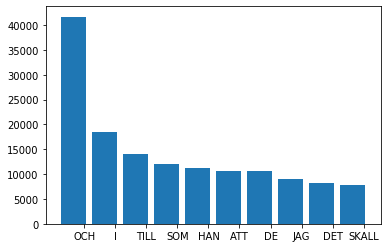

In [12]:
counts = dict(Counter(symbols).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

## Calculate frequencies of sequences

In [17]:
from NDSparseTensor import NDSparseTensor as Sparse

start = timeit.time.time()
frequencies2d = Sparse((number_of_unique_symbols, number_of_unique_symbols))
for previous, current in zip(symbols[:-1], symbols[1:]):
    index_previous = unique_symbols.index(previous)
    index_current = unique_symbols.index(current)

    frequencies2d[index_previous, index_current] += 1
end = timeit.time.time()

print(f'Time: {end-start} seconds')
print(unique_symbols[:10])
print(frequencies2d[:10, :10].todense())

i1 = 2
i2 = 0
print(f"Sequence '{i1} {i2}': '{unique_symbols[i1]} {unique_symbols[i2]}' occurs {frequencies2d[i1, i2]} times")

Time: 43.41595387458801 seconds
['OCH', 'I', 'TILL', 'SOM', 'HAN', 'ATT', 'DE', 'JAG', 'DET', 'SKALL']
[[4.000e+00 6.680e+02 3.130e+02 2.350e+02 1.484e+03 2.700e+02 1.470e+03
  7.040e+02 4.000e+02 1.020e+02]
 [3.600e+01 2.500e+01 1.400e+01 1.350e+02 1.000e+00 5.400e+01 1.250e+02
  0.000e+00 4.780e+02 1.000e+00]
 [8.500e+01 3.300e+01 1.000e+00 1.000e+00 0.000e+00 5.850e+02 1.220e+02
  0.000e+00 1.110e+02 1.000e+00]
 [1.000e+00 2.580e+02 1.200e+01 0.000e+00 3.900e+02 2.000e+00 2.090e+02
  4.640e+02 3.500e+01 1.240e+02]
 [6.200e+01 1.010e+02 2.450e+02 2.970e+02 9.000e+00 3.400e+01 1.100e+01
  1.900e+01 2.100e+01 5.820e+02]
 [1.000e+00 5.130e+02 7.000e+00 0.000e+00 8.120e+02 0.000e+00 7.900e+02
  6.170e+02 3.690e+02 0.000e+00]
 [5.900e+01 4.000e+01 9.100e+01 4.960e+02 1.000e+00 2.400e+01 5.000e+00
  0.000e+00 1.600e+01 0.000e+00]
 [5.700e+01 1.210e+02 4.000e+01 5.900e+01 1.000e+00 5.000e+01 1.000e+00
  1.500e+01 3.100e+01 9.100e+02]
 [1.810e+02 1.510e+02 8.700e+01 4.150e+02 8.500e+01 5.370

In [14]:
frequencies = {}

for m in range(1, 10):
    start = timeit.time.time()
    # print(f'm = {m}', [l[i:(-m+i)%len(l)+1] for i in range(m)])

    N = number_of_unique_symbols
    shape = tuple([N for _ in range(m)])
    frequencies_m = SparseMatrix(shape)

    sequences = [symbols[i:(-m+i)%len(symbols)+1] for i in range(m)]
    for sequence_m in zip(*sequences):
        symbol_indicies_m = tuple([unique_symbols.index(s) for s in sequence_m])
        frequencies_m[symbol_indicies_m] += 1

    end = timeit.time.time()

    print(f'Calculated m={m}, shape={frequencies_m.shape} in {end-start} seconds')
    # some = tuple([slice(None, 3) for x in shape])
    # print(frequencies_m[some].todense())
    frequencies[m] = frequencies_m

Calculated m=1, shape=(24960,) in 27.05338430404663 seconds
Calculated m=2, shape=(24960, 24960) in 51.611706018447876 seconds


KeyboardInterrupt: 

## Example of accessing the frequencies
Length of symbol sequence `m`

In [15]:
m = 2
i1 = 9
i2 = 8
print(f"Sequence '{i1} {i2}': '{unique_symbols[i1]} {unique_symbols[i2]}' occurs {frequencies[m][i1, i2]} times")

m = 3
i1 = 9
i2 = 8
i3 = 0
print(f"Sequence '{i1} {i2} {i3}': '{unique_symbols[i1]} {unique_symbols[i2]} {unique_symbols[i3]}' occurs {frequencies[m][i1, i2, i3]} times")

Sequence '9 8': 'SKALL DET' occurs 152 times


KeyError: 3

Text(0, 0.5, 'Unique sequences, $S_m$')

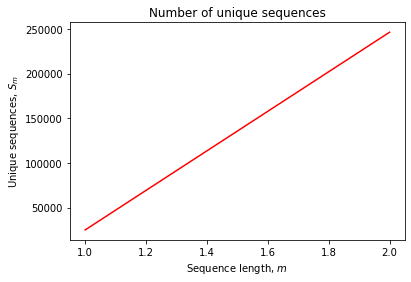

In [16]:
m_array = []
n_array = []
for m in range(1, len(frequencies)+1):
    n = len(frequencies[m].getnonzero())
    m_array.append(m)
    n_array.append(n)
plot(m_array, n_array, 'r-')
title(f'Number of unique sequences')
xlabel('Sequence length, $m$')
ylabel('Unique sequences, $S_m$')

In [ ]:
m = 7
nonzeros = frequencies[m].getnonzero()

keys = list([x[0] for x in nonzeros])
values = list([x[1] for x in nonzeros])
sort = (np.argsort(values)[::-1])
keys = np.array(keys)[sort]
values = np.array(values)[sort]

most_common_sequence_m = [unique_symbols[k] for k in keys[0]]
print(f"The most common sequence of length m={m} is: \n'{' '.join(most_common_sequence_m)}' \nwhich occurs {values[0]} times")

## Save files

In [ ]:
import json
text_name
m = 2
with open(f'frequencies/{text_name}.json', 'w', encoding="utf8") as f:
    json.dump(frequencies[m], f)

In [117]:
def serialize(obj):
    """JSON serializer for objects not serializable by default json code"""

    if isinstance(obj, SparseMatrix):
        return obj.tojson()

with open(f'frequencies/test.json', 'w', encoding="utf8") as f:
    json.dump(frequencies, f, default=serialize)

TypeError: key (3399,) is not a string